In [2]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

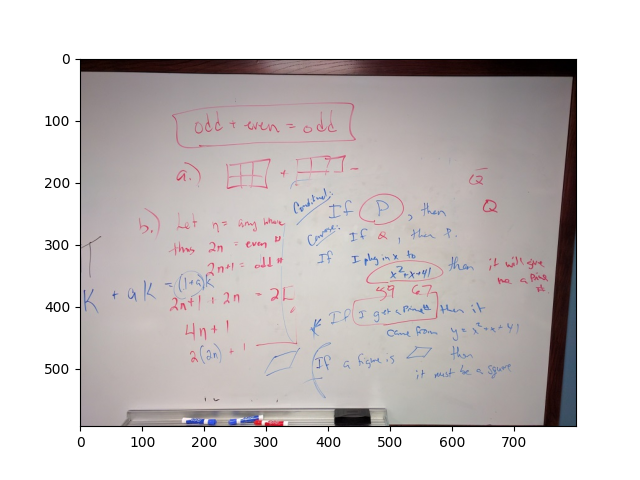

In [3]:
""" Python script demostrating image modification and creation via NumPy array slicing."""

#load an display original image
board = iio.imread(uri="data/board.jpg")
board = np.array(board)
fig, ax = plt.subplots()
ax.imshow(board)


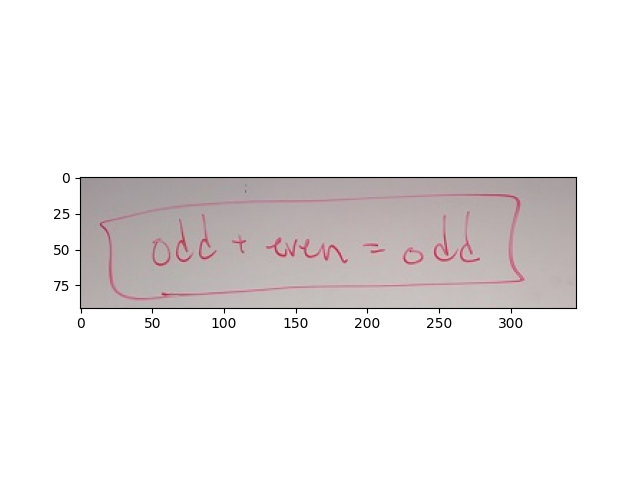

In [4]:
# use array slicing to create a new image with our selected area and then display the new image.
# extract, display, and save sub-image
clipped_board = board[60:151,  135:481, :]
fig, ax = plt.subplots()
ax.imshow(clipped_board)
iio.imwrite(uri="data/clipped_board.tif", image=clipped_board)

sample pixel = [198 189 190]


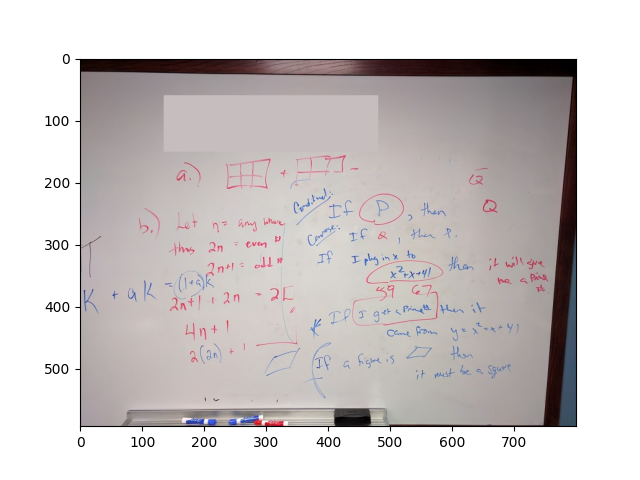

In [5]:
# replace clipped area with sampled color 
color = board[330, 90]
print(f"sample pixel = {color}") 
board[60:151, 135:481] = color
fig, ax = plt.subplots()
ax.imshow(board)



(400, 602, 3)

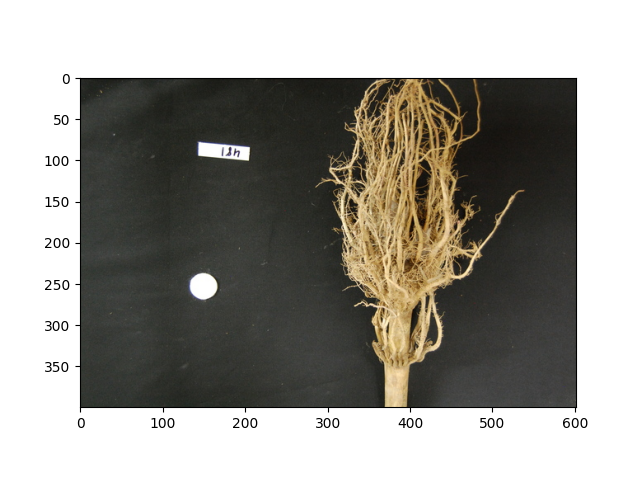

In [6]:
""" Python script to extract a sub-image containing only the plant and roots in an existing image."""

# load and display original image
maize_roots = iio.imread(uri="data/maize-root-cluster.jpg")
fig, ax = plt.subplots()
ax.imshow(maize_roots)
maize_roots.shape


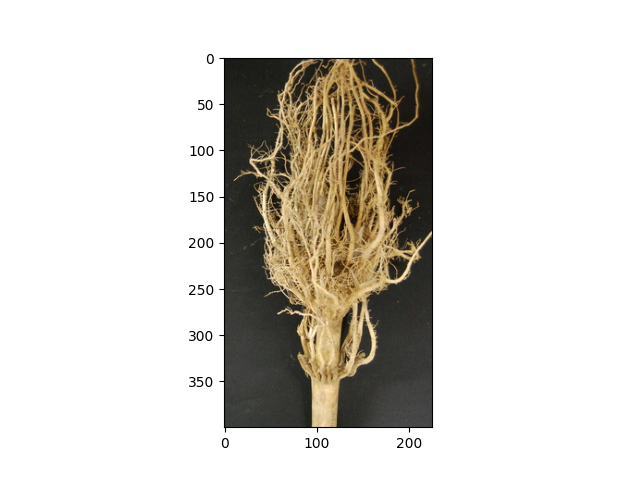

In [7]:
# extract and display sub-image
clipped_maize = maize_roots[0:400, 275:500, :]
fig, ax = plt.subplots()
ax.imshow(clipped_maize)

#save sub-image
iio.imwrite(uri="data/clipped_maize.jpg", image=clipped_maize)

maize_seedlings.shape = (800, 800, 3)
maize_seedlings.shape[0:2] = (800, 800)


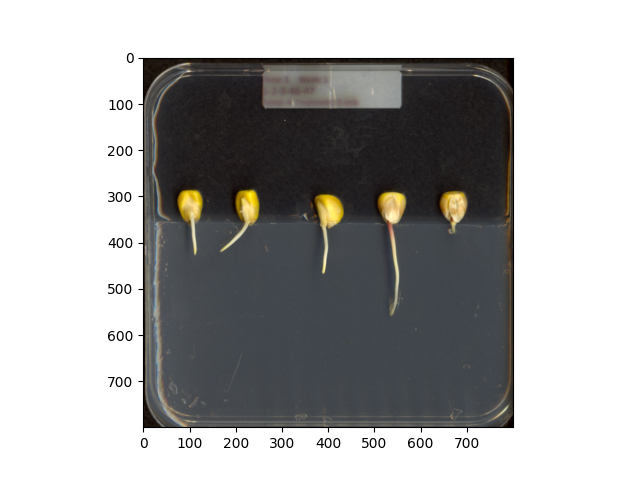

In [8]:
'''suppose we want to analyze only the area of the image containing the roots themselves; we do not care to look at the kernels,
or anything else about the plants
'''
# Load and display the original image
maize_seedlings = iio.imread(uri="data/maize-seedlings.tif")
print(f"maize_seedlings.shape = {maize_seedlings.shape}")
print(f"maize_seedlings.shape[0:2] = {maize_seedlings.shape[0:2]}")

fig, ax = plt.subplots()
ax.imshow(maize_seedlings)

In [9]:
# create the basic mask
mask = np.ones(shape=maize_seedlings.shape[0:2], dtype="bool")
# Draw filled rectangle on the mask image
rr, cc = ski.draw.rectangle(start=(357, 44), end=(740,720))
print(f"rr.shape = {rr.shape}, cc.shape = {cc.shape}")                            
mask[rr,cc]=False

# Apply the mask
maize_seedlings[mask] = 0


rr.shape = (677, 384), cc.shape = (677, 384)


In [10]:
help(ski.draw.rectangle)


Help on function rectangle in module skimage.draw.draw:

rectangle(start, end=None, extent=None, shape=None)
    Generate coordinates of pixels within a rectangle.

    Parameters
    ----------
    start : tuple
        Origin point of the rectangle, e.g., ``([plane,] row, column)``.
    end : tuple
        End point of the rectangle ``([plane,] row, column)``.
        For a 2D matrix, the slice defined by the rectangle is
        ``[start:(end+1)]``.
        Either `end` or `extent` must be specified.
    extent : tuple
        The extent (size) of the drawn rectangle.  E.g.,
        ``([num_planes,] num_rows, num_cols)``.
        Either `end` or `extent` must be specified.
        A negative extent is valid, and will result in a rectangle
        going along the opposite direction. If extent is negative, the
        `start` point is not included.
    shape : tuple, optional
        Image shape used to determine the maximum bounds of the output
        coordinates. This is useful for

In [11]:
# Esto solo lo hago por curiosidad, para ver los arrays que retorna el metodo rectangle
rrr, ccc = ski.draw.rectangle(start=(30, 40), end=(50,70))
print(f"rrr = {rrr.shape} \n {rrr} ")
print(f"ccc = {ccc.shape} \n {ccc}")

rrr = (31, 21) 
 [[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 

In [12]:
# create the black canvas 
canvas = np.zeros(shape=(600, 800, 3), dtype="uint8")
canvas


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(600, 800, 3), dtype=uint8)

In [13]:
# Draw a blue circle with centre (200, 300) in (ry, cx) coordinates, and radius 100
rr, cc = ski.draw.disk(center=(200,300), radius=100, shape=canvas.shape[0:2])
canvas[rr, cc] = (0, 0, 255)

In [14]:
# Draw a green line from (400, 200) to (500, 700) in (ry, cx) coordinates
rr, cc = ski.draw.line(r0=400, c0=200, r1=500, c1=700)
canvas[rr, cc] = (0, 255, 0)

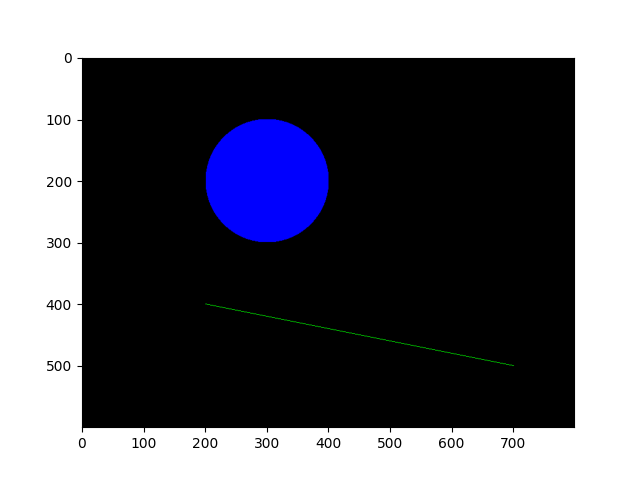

In [15]:
# Display the image
fig, ax = plt.subplots()
ax.imshow(canvas)

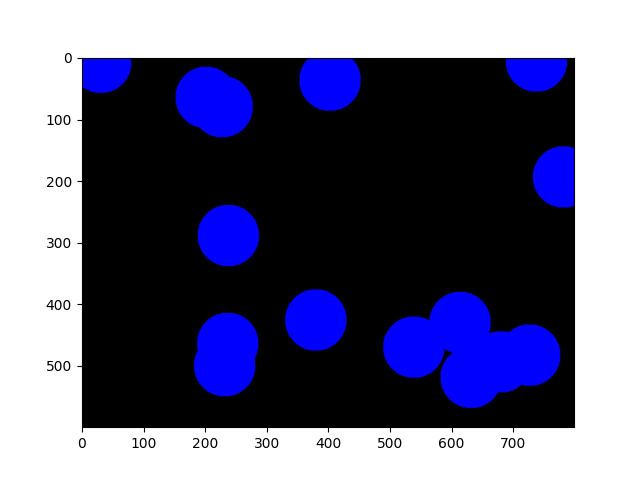

In [16]:
# draw rectangles, circles and lines at random position within our black canvas

import random

# create the black canvas
canvas = np.zeros(shape=(600, 800, 3), dtype="uint8")

#draw a blue circle at a random location 15 times
for i in range(15):
    rr, cc = ski.draw.disk(center=(
        random.randrange(600),
        random.randrange(800)),
        radius=50,
        shape=canvas.shape[0:2],
        )
    canvas[rr, cc] = (0, 0, 255)

# display the results
fig, ax = plt.subplots()
ax.imshow(canvas)

    

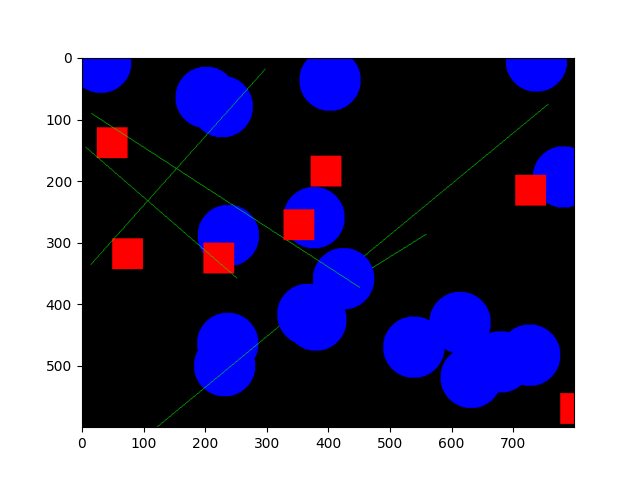

In [17]:
# Draw 15 random shapes (rectangle, circle or line) at randon at random position
for i in range(15):
    # generate a random number between 0.0 and 1.0 and use this to decide if we
    # want a circle, a line or a sphere
    x = random.random()
    if x < 0.33:
        # draw a blue circle at a random lacation
        rr, cc = ski.draw.disk(center=(
            random.randrange(600),
            random.randrange(800)),
            radius=50,
            shape=canvas.shape[0:2],
        )
        color = (0, 0, 255)

    elif x < 0.66:
         # draw a green line at a random location 
         rr, cc = ski.draw.line(
             r0=random.randrange(600), 
             c0=random.randrange(800),
             r1= random.randrange(600),
             c1=random.randrange(800),
         )
         color = (0, 255, 0)
    else:
        #draw a red rectangle at a random location
        rr, cc = ski.draw.rectangle(
            start=(random.randrange(600), random.randrange(800)),
            extent=(50, 50),
            shape=canvas.shape[0:2],
        )
        color = (255, 0, 0)

    canvas[rr, cc] = color

# display the results
fig, ax = plt.subplots()
ax.imshow(canvas)
            
         


In [18]:
# Load the original image
maize_seedlings = iio.imread(uri="data/maize-seedlings.tif")

# Create the basic mask
mask = np.ones(shape=maize_seedlings.shape[0:2], dtype="bool")

# Draw a filled rectangle on the mask image
rr, cc = ski.draw.rectangle(start=(357, 44), end=(740, 720))
mask[rr, cc] = False

In [19]:
# we use Numpy indexing to remove the portions of the image, where the mask is True:
# apply the mask 
maize_seedlings[mask] = 0

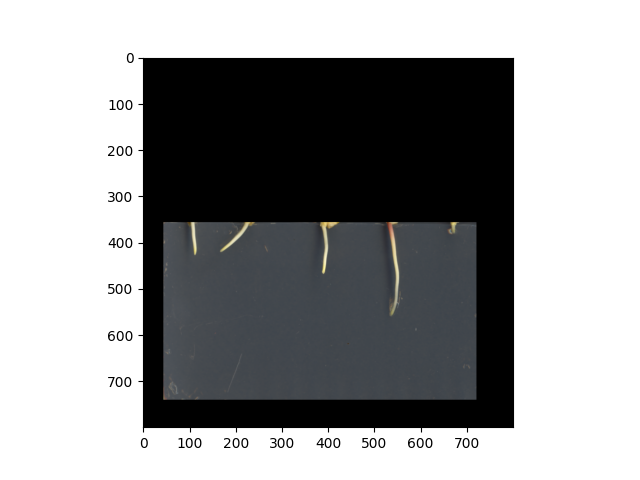

In [20]:
fig, ax = plt.subplots()
ax.imshow(maize_seedlings)

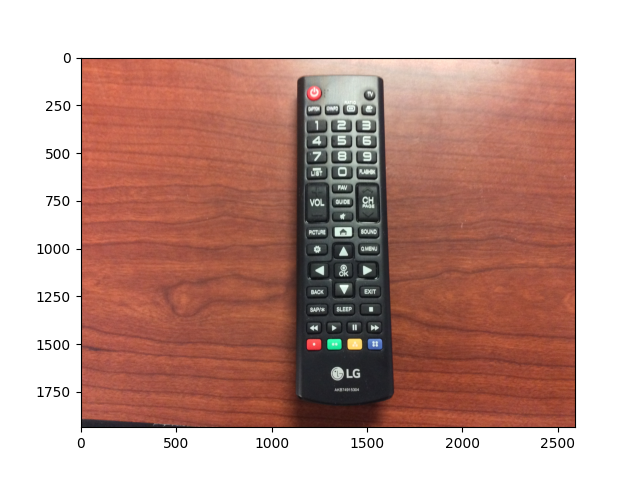

In [21]:
# Load the image
remote = iio.imread(uri="data/remote-control.jpg")
remote = np.array(remote)

fig, ax = plt.subplots()
ax.imshow(remote)
            



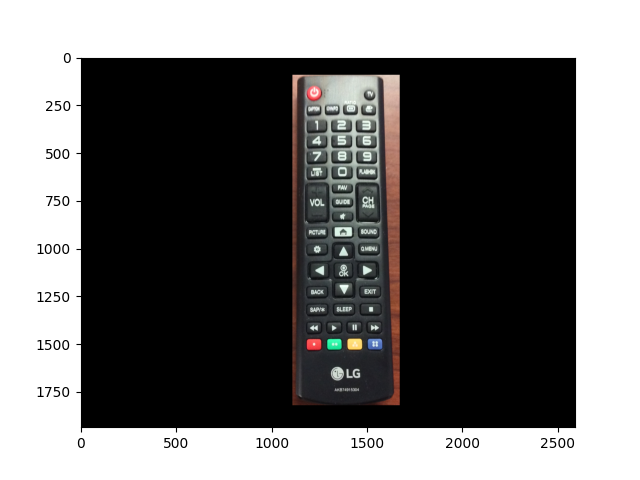

In [22]:
# create the basic mask
mask  = np.ones(shape=remote.shape[0:2], dtype="bool")

# Draw a filled rectangle on the mask image
rr, cc = ski.draw.rectangle(start=(93, 1107), end=(1821, 1668))
mask[rr, cc] = False

# Apply the mask 
remote[mask] = 0

# Display the result 
fig, ax = plt.subplots()
ax.imshow(remote)


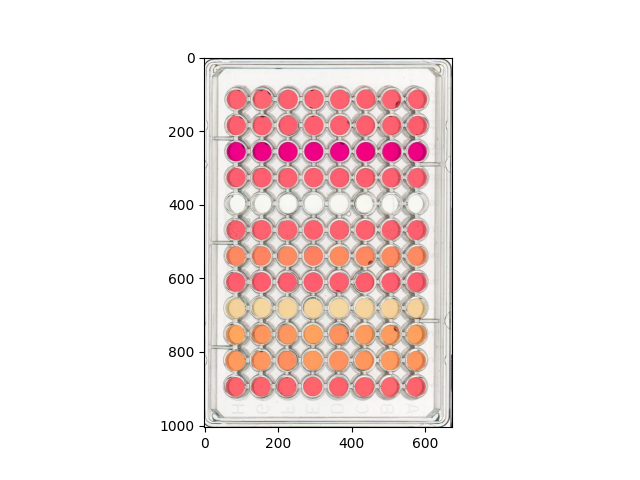

In [23]:
# Consider this image of a 96-well plate that has been scanned on a flatbed scanner
# Load the image
wellplate = iio.imread(uri="data/wellplate-01.jpg")
wellplate = np.array(wellplate)

# Display the image
fig, ax = plt.subplots()
ax.imshow(wellplate)




[[ 91. 108.]
 [161. 108.]
 [231. 108.]
 [301. 108.]
 [371. 108.]
 [441. 108.]
 [511. 108.]
 [581. 108.]
 [ 91. 180.]
 [161. 180.]
 [231. 180.]
 [301. 180.]
 [371. 180.]
 [441. 180.]
 [511. 180.]
 [581. 180.]
 [ 91. 252.]
 [161. 252.]
 [231. 252.]
 [301. 252.]
 [371. 252.]
 [441. 252.]
 [511. 252.]
 [581. 252.]
 [ 91. 324.]
 [161. 324.]
 [231. 324.]
 [301. 324.]
 [371. 324.]
 [441. 324.]
 [511. 324.]
 [581. 324.]
 [ 91. 396.]
 [161. 396.]
 [231. 396.]
 [301. 396.]
 [371. 396.]
 [441. 396.]
 [511. 396.]
 [581. 396.]
 [ 91. 468.]
 [161. 468.]
 [231. 468.]
 [301. 468.]
 [371. 468.]
 [441. 468.]
 [511. 468.]
 [581. 468.]
 [ 91. 540.]
 [161. 540.]
 [231. 540.]
 [301. 540.]
 [371. 540.]
 [441. 540.]
 [511. 540.]
 [581. 540.]
 [ 91. 612.]
 [161. 612.]
 [231. 612.]
 [301. 612.]
 [371. 612.]
 [441. 612.]
 [511. 612.]
 [581. 612.]
 [ 91. 684.]
 [161. 684.]
 [231. 684.]
 [301. 684.]
 [371. 684.]
 [441. 684.]
 [511. 684.]
 [581. 684.]
 [ 91. 756.]
 [161. 756.]
 [231. 756.]
 [301. 756.]
 [371. 756.]

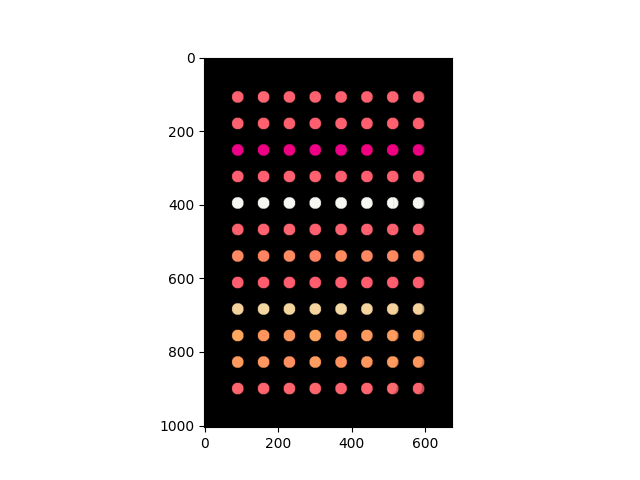

In [24]:
# load the well coordinates as a NumPy array
centers = np.loadtxt("data/centers.txt", delimiter=" ")
print(centers)
print(f"type {type(centers)},  centers.shape = {centers.shape} ")


# read in original image
wellplate = iio.imread(uri="data/wellplate-01.jpg")
wellplate = np.array(wellplate)

# create the mask image
mask = np.ones(shape=wellplate.shape[0:2], dtype="bool")
print(mask[0,0:20])
# iterate through the well coordinates
for cx, ry in centers:
    # draw a circle on the mask at the well center
    rr, cc = ski.draw.disk(center=(ry, cx), radius=16, shape=wellplate.shape[:2])
    mask[rr, cc] = False


# apply the mask
wellplate[mask] = 0

# display the result
fig, ax = plt.subplots()
ax.imshow(wellplate)

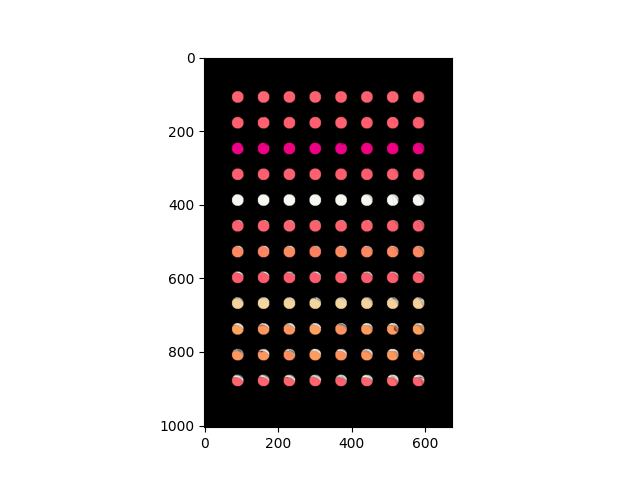

In [25]:
''' Assume that the centre of the upper left well in the image is at location cx = 91 and ry = 108, 
and that there are 70 pixels between each centre in the cx dimension and 72 pixels between each 
centre in the ry dimension. Each well still has a radius of 16 pixels. '''
# read in original image
wellplate = iio.imread(uri="data/wellplate-01.jpg")
wellplate = np.array(wellplate)

# create the mask image
mask = np.ones(shape=wellplate.shape[0:2], dtype="bool")

# upper left well coordinates
cx0 = 91
ry0 = 108

# spaces between wells
deltaCX = 70
deltaRY = 72

cx = cx0
ry = ry0

# iterate each row and column
for row in range(12):
    # reset cx to leftmost well in the row
    cx = cx0
    for col in range(8):

        # ... and drawing a circle on the mask
        rr, cc = ski.draw.disk(center=(ry, cx), radius=16, shape=wellplate.shape[0:2])
        mask[rr, cc] = False
        cx += deltaCX
    # after one complete row, move to next row    
    ry +=deltaCX
# apply the mask
wellplate[mask] = 0

# display the result
fig, ax = plt.subplots()
ax.imshow(wellplate)


plant_seedling.shape = (598, 900), type(plant_seedling) = <class 'numpy.ndarray'>)


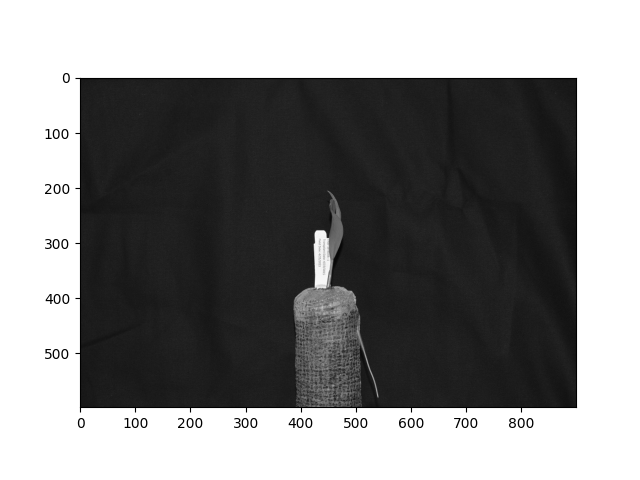

In [26]:
# here we load the image in grayscale instead of full colour, and display it

# read the image of a plant seedling as grayscale from the outset
plant_seedling = iio.imread(uri="data/plant-seedling.jpg", mode="L")
print(f"plant_seedling.shape = {plant_seedling.shape}, type(plant_seedling) = {type(plant_seedling)})")
# convert the image to float dtype with a value range from 0 to 1
plant_seedling = ski.util.img_as_float(plant_seedling)
# display the image
fig, ax = plt.subplots()
ax.imshow(plant_seedling, cmap="gray")



In [27]:
# create the histogram 
histogram, bin_edges = np.histogram(plant_seedling, bins=256, range=(0, 1))
print(f"type(bin_edges) = {type(bin_edges)} , bin_edges.shape = {bin_edges.shape}") 
print(bin_edges)
print(f"type(histogram) = {type(histogram)} , histogram.shape = {histogram.shape}") 
histogram


type(bin_edges) = <class 'numpy.ndarray'> , bin_edges.shape = (257,)
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32

array([    0,     1,     2,     0,     5,     9,    11,    12,    34,
          57,    56,    53,    49,    32,    42,    39,    65,    90,
         217,   677,  1758,  3246,  5386,  8359, 11830, 16599, 23111,
       31062, 39014, 45779, 50081, 51052, 48757, 42623, 36116, 28400,
       21547, 15302, 10349,  6871,  4263,  2478,  1496,   901,   552,
         357,   237,   173,   137,   135,   144,   114,   149,   129,
         139,   134,   147,   144,   147,   177,   150,   174,   193,
         188,   195,   186,   181,   207,   210,   183,   216,   231,
         227,   256,   248,   247,   246,   246,   244,   263,   285,
         274,   264,   270,   251,   238,   281,   253,   302,   274,
         275,   294,   300,   278,   323,   326,   368,   362,   319,
         323,   362,   345,   396,   402,   373,   407,   420,   408,
         421,   387,   385,   362,   338,   342,   315,   322,   320,
         335,   326,   304,   311,   301,   305,   257,   270,   264,
         250,   275,

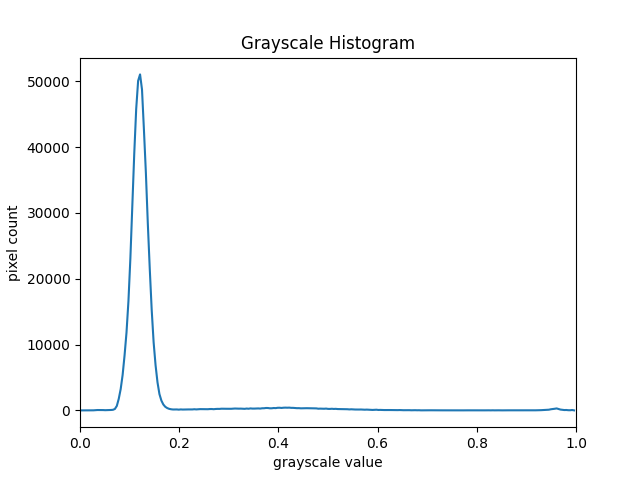

In [28]:
# configure and draw the histogram figure
fig, ax = plt.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0.0, 1.0]) # <- named arguments do not work here

ax.plot(bin_edges[0:-1], histogram)  # <- or here

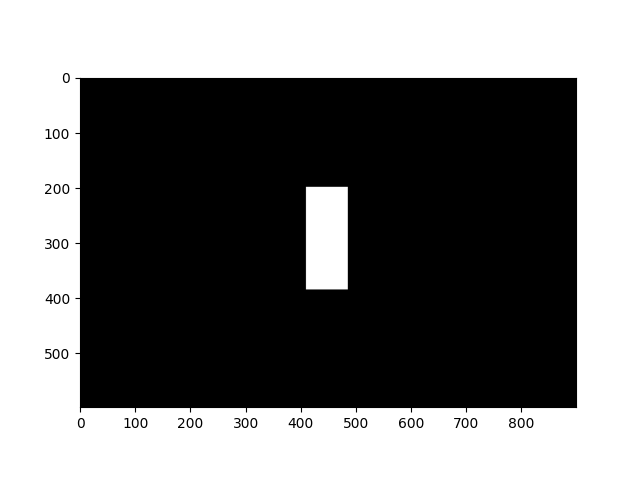

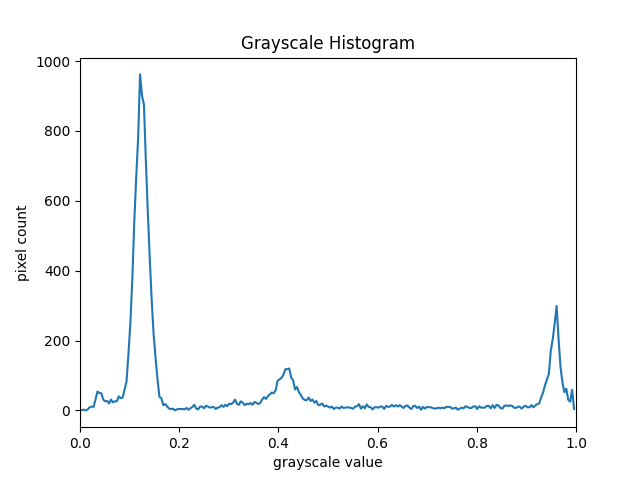

In [39]:
#create mask here, using np.zeros() and ski.draw.rectangle()
mask = np.zeros(shape=plant_seedling.shape, dtype="bool")
rr, cc = ski.draw.rectangle(start=(199, 410), end=(384, 485))
mask[rr, cc] = True

# display the mask 
fig, ax = plt.subplots()
ax.imshow(mask, cmap="gray")

# mask the image and create the new histogram
histogram, bin_edges = np.histogram(plant_seedling[mask], bins=256, range=(0.0, 1.0))

# configure and draw the histogram figure
fig, ax = plt.subplots()

ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0.0, 1.0])
ax.plot(bin_edges[0:-1], histogram)

(598, 900, 3)
[[30 29 26 30 32 30 30 28 31 29 29 30 31 30 31 32 32 32 32 33 31 30 30 31
  32 31 31 33 34 32]
 [29 29 27 30 31 29 30 29 30 28 28 29 30 30 30 31 31 34 33 28 28 34 35 32
  29 30 32 33 33 32]
 [29 30 29 31 31 29 31 31 33 31 30 30 30 29 29 29 31 31 31 32 34 34 33 32
  27 31 33 32 31 32]
 [30 31 30 31 31 29 32 31 34 33 33 31 30 29 29 30 32 30 31 35 35 32 30 32
  29 32 34 31 30 32]
 [31 32 29 31 31 30 32 30 31 32 32 32 31 31 32 34 32 34 33 29 29 32 34 33
  31 33 32 30 31 33]
 [31 31 29 30 31 31 32 29 30 31 32 31 30 31 32 33 33 33 33 32 31 32 34 35
  32 32 31 30 32 34]
 [31 32 30 31 32 32 33 29 32 32 32 30 30 32 32 31 34 31 32 37 36 31 30 34
  32 31 32 32 33 34]
 [31 33 31 32 33 33 34 30 33 32 31 31 32 35 34 32 35 35 34 32 32 32 32 30
  31 32 33 34 34 33]
 [30 36 28 27 38 35 26 31 28 31 36 35 30 34 29 34 35 33 33 32 30 31 34 34
  32 34 35 35 34 33]
 [30 29 33 34 30 30 33 31 31 31 35 31 37 32 35 30 32 32 35 35 32 32 34 35
  35 34 32 31 31 33]
 [32 26 32 35 29 32 36 30 33 36 31 3

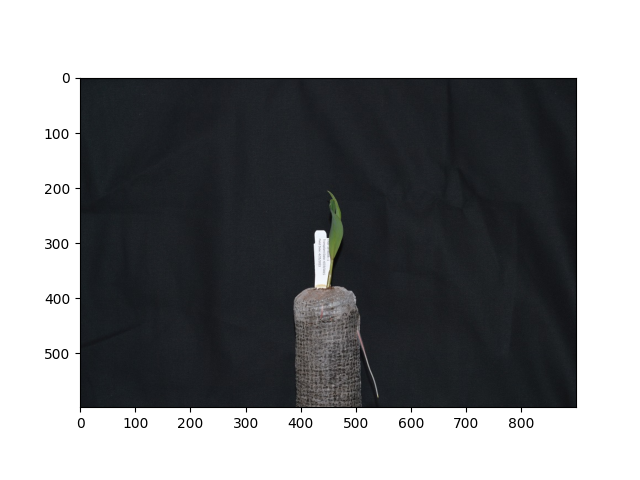

In [49]:
#read original image, in full color
plant_seedling = iio.imread(uri="data/plant-seedling.jpg")
print(plant_seedling.shape)
print(plant_seedling[:20,0:30,2])
# display the image
fig, ax = plt.subplots()
ax.imshow(plant_seedling)



Text(0, 0.5, 'Pixel count')

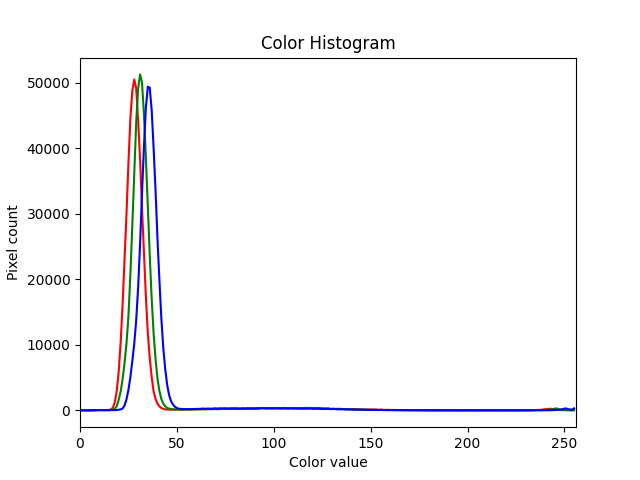

In [51]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for each color
# each color 

fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        plant_seedling[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax.plot(bin_edges[0:-1], histogram, color= color)

ax.set_title("Color Histogram")
ax.set_xlabel("Color value")
ax.set_ylabel("Pixel count")


    


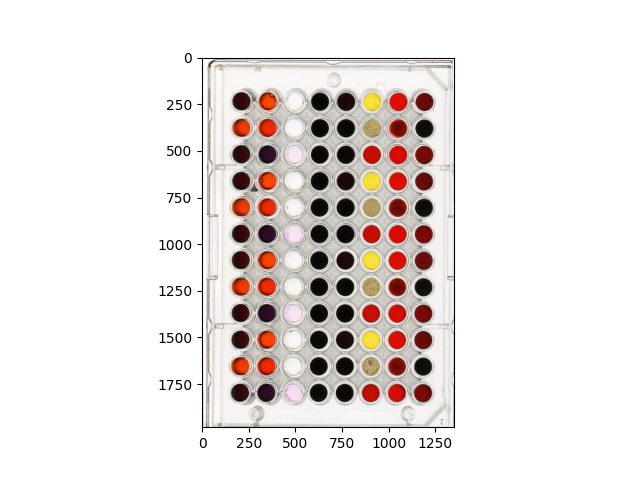

In [54]:
# read the image 
wellplate = iio.imread(uri="data/wellplate-02.tif")

# display the image
fig, ax = plt.subplots()
ax.imshow(wellplate)

(7521,) (7521,)


Text(0, 0.5, 'pixel count')

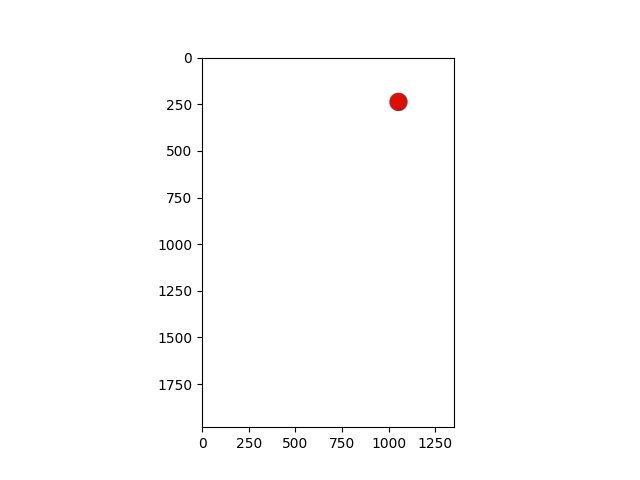

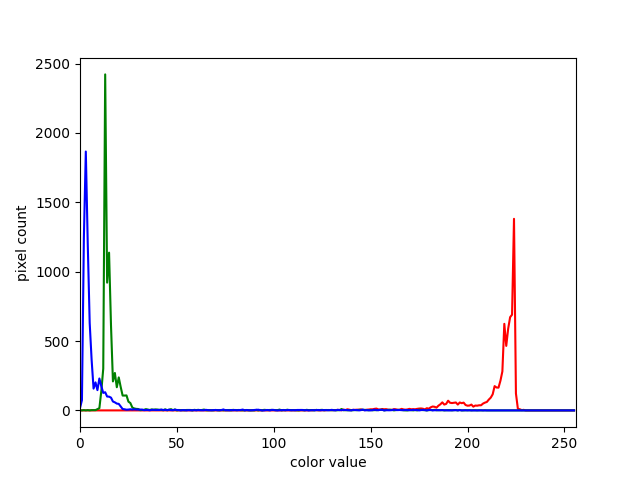

In [65]:
# create a circular mask to select the 7th well in the first row 
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
circle = ski.draw.disk(center=(240, 1053), radius=49, shape=wellplate.shape[0:2])
print(circle[0].shape, circle[1].shape)
mask[circle] = 1

# just for display:
# make a copy of the image, call it masked_image, and 
# zero values where mask is False
masked_img = np.array(wellplate)
masked_img[~mask] = 0

# create a new figure and display masked_img, to verify the 
# validity of your mask

fig, ax = plt.subplots()
ax.imshow(masked_img)

# list t select colors of each channel line 
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for 
# each color 
fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for(channel_id, color) in enumerate(colors):
    # use your circular mask to apply the histogram
    # operation to the 7th well of the first row
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )

    ax.plot(histogram, color=color)

ax.set_xlabel("color value")
ax.set_ylabel("pixel count")


    